# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
DATA_PATH = 'data'

In [3]:
DATA_PATH

'data'

In [4]:
data = pd.read_csv(f"{DATA_PATH}/lc_loan.csv")

/var/folders/k3/9_g2bn810b93x8c0jjjcy7bm0000gn/T/ipykernel_69333/674359527.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{DATA_PATH}/lc_loan.csv")


In [5]:
print(data.shape)
data.head()

(887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

# check null values

(40,)


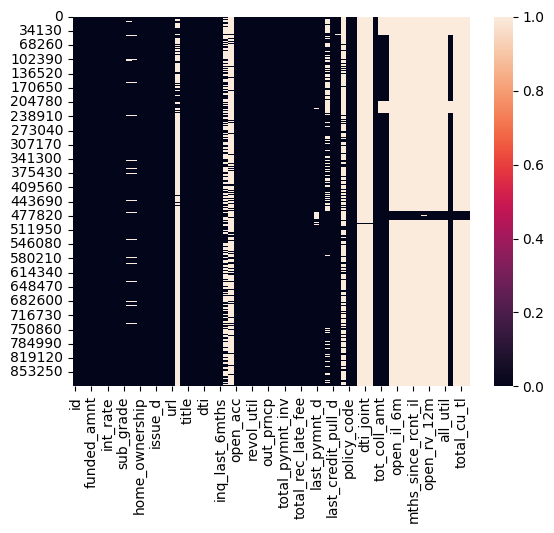

In [7]:
print(data.columns[data.isna().sum()>0].shape)
sns.heatmap(data.isna())
plt.show()

In [110]:
# null_df = 
(
    (data.isna().sum()/ data.shape[0])
    .round(2)
    .to_frame()
    .sort_values(by=0,ascending=False)
    .rename(columns={0:'% Null'})
)


,% Null
annual_inc_joint,1.00
dti_joint,1.00
verification_status_joint,1.00
open_acc_6m,0.98
inq_last_12m,0.98
...,...
annual_inc,0.00
issue_d,0.00
verification_status,0.00
loan_status,0.00


## conclusions from null:
* remove join apps

In [115]:
data['application_type'].value_counts()

application_type
INDIVIDUAL    886868
JOINT            511
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='application_type'>

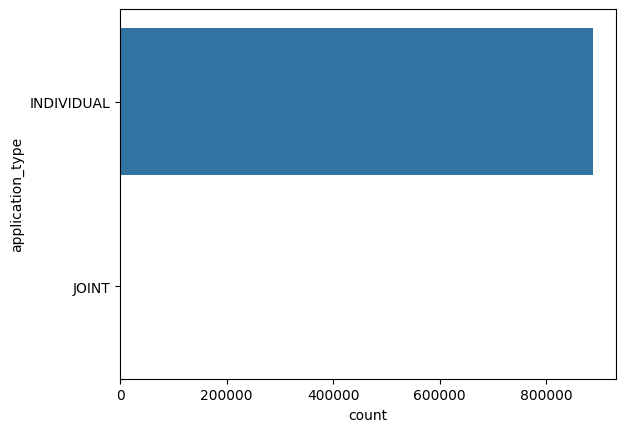

In [118]:
sns.countplot(data=data,y='application_type')

In [112]:
data1 = (
    data['application_type']!='JOINT'
)

In [8]:
## target column: loans status charge of vs all the rest- remove rejected (maybe many missing data.)
## find continuios features
## find categorical feature
## find null values - and figure out how to imput it.. maybe null is good - no deafault
## correlations


In [13]:
desc = data.describe( )
desc.style.format('{:.2f}')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887375.00,887379.00,887350.00,887350.00,433067.00,137053.00,887350.00,887350.00,887379.00,886877.00,887350.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887234.00,221703.00,887379.00,511.00,509.00,887350.00,817103.00,817103.00,21372.00,21372.00,21372.00,21372.00,20810.00,21372.00,18617.00,21372.00,21372.00,21372.00,21372.00,817103.00,21372.00,21372.00,21372.00
mean,32465133.06,35001824.82,14755.26,14741.88,14702.46,13.25,436.72,75027.59,18.16,0.31,0.69,34.06,70.12,11.55,0.20,16920.79,55.07,25.27,8403.12,8399.71,7558.83,7521.16,5757.71,1754.80,0.40,45.92,4.88,2164.15,0.01,44.10,1.00,109981.01,18.31,0.00,225.70,139458.19,1.11,2.93,0.76,1.67,20.91,36552.81,71.54,1.39,2.98,5887.98,60.83,32068.62,0.94,1.54,1.98
std,22827341.72,24113354.68,8435.46,8429.90,8442.11,4.38,244.19,64698.30,17.19,0.86,1.00,21.88,28.13,5.32,0.58,22426.79,23.83,11.84,8493.45,8490.00,7871.24,7846.11,6625.44,2095.36,4.09,409.69,63.13,4794.78,0.13,22.18,0.00,52730.38,7.17,0.08,10311.37,153749.97,1.24,3.09,1.00,1.69,27.21,43103.83,23.02,1.52,2.63,5284.70,20.01,37498.26,1.45,2.72,2.87
min,54734.00,70473.00,500.00,500.00,0.00,5.32,15.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,17950.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00
25%,9206643.00,10877133.50,8000.00,8000.00,8000.00,9.99,260.70,45000.00,11.91,0.00,0.00,15.00,51.00,8.00,0.00,6443.00,37.70,17.00,0.00,0.00,1914.59,1899.70,1200.57,441.46,0.00,0.00,0.00,280.17,0.00,27.00,1.00,76032.50,13.20,0.00,0.00,29853.00,0.00,1.00,0.00,0.00,6.00,10251.50,58.60,0.00,1.00,2411.00,47.70,13900.00,0.00,0.00,0.00
50%,34433267.00,37095283.00,13000.00,13000.00,13000.00,12.99,382.55,65000.00,17.65,0.00,0.00,31.00,70.00,11.00,0.00,11875.00,56.00,24.00,6458.29,6455.81,4895.00,4862.01,3215.32,1073.28,0.00,0.00,0.00,462.78,0.00,44.00,1.00,101771.00,17.61,0.00,0.00,80559.00,1.00,2.00,0.00,1.00,12.00,24684.50,74.90,1.00,2.00,4483.00,61.90,23700.00,0.00,0.00,2.00
75%,54908135.00,58471347.00,20000.00,20000.00,20000.00,16.20,572.60,90000.00,23.95,0.00,1.00,50.00,92.00,14.00,0.00,20829.00,73.60,32.00,13659.06,13654.05,10616.81,10565.69,8000.00,2238.27,0.00,0.00,0.00,831.25,0.00,61.00,1.00,132800.00,22.65,0.00,0.00,208205.00,2.00,4.00,1.00,2.00,23.00,47858.00,87.60,2.00,4.00,7771.50,75.20,39800.00,1.00,2.00,3.00
max,68617057.00,73544841.00,35000.00,35000.00,35000.00,28.99,1445.46,9500000.00,9999.00,39.00,33.00,188.00,129.00,90.00,86.00,2904836.00,892.30,169.00,49372.86,49372.86,57777.58,57777.58,35000.03,24205.62,358.68,33520.27,7002.19,36475.59,20.00,188.00,1.00,500000.00,43.86,14.00,9152545.00,8000078.00,14.00,40.00,12.00,19.00,363.00,878459.00,223.30,22.00,43.00,127305.00,151.40,9999999.00,17.00,35.00,32.00


Col:  id 887379


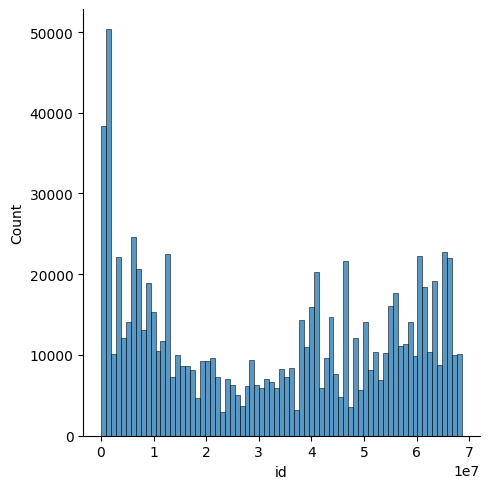

Col:  member_id 887379


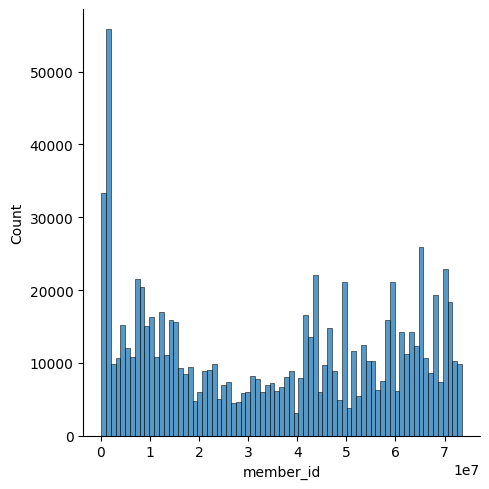

Col:  loan_amnt 1372


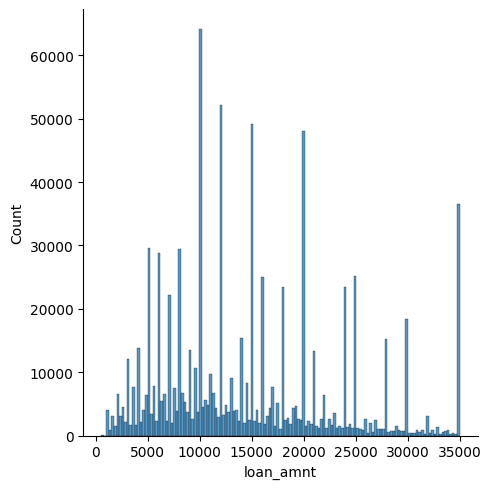

Col:  funded_amnt 1372


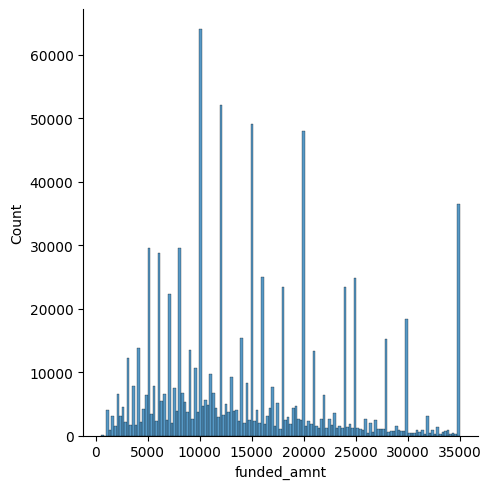

Col:  funded_amnt_inv 9856


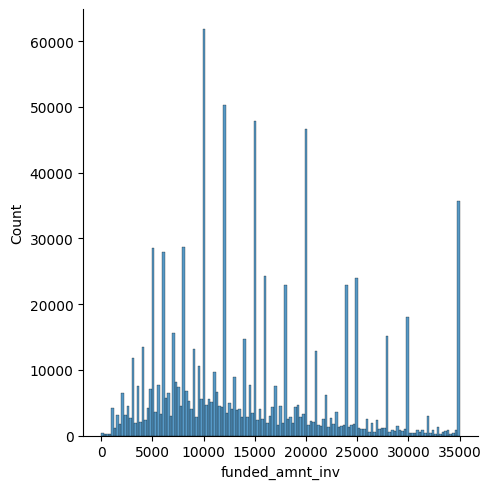

Col:  term 2


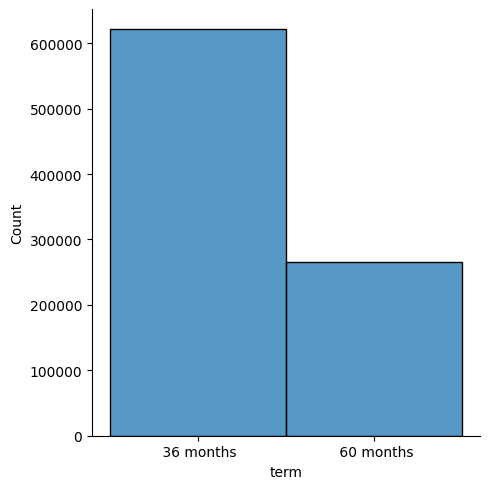

Col:  int_rate 542


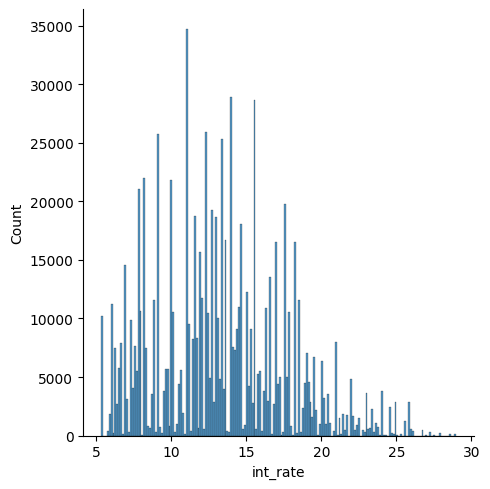

Col:  installment 68711


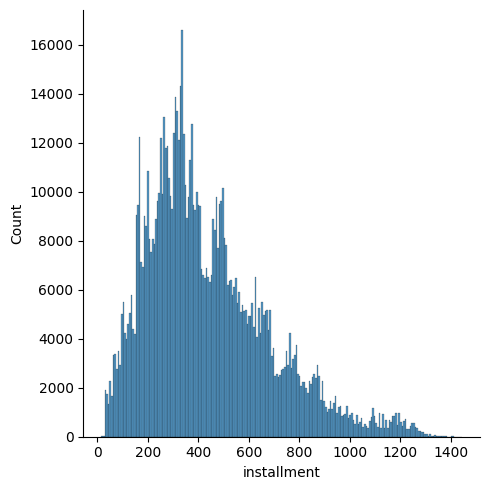

Col:  grade 7


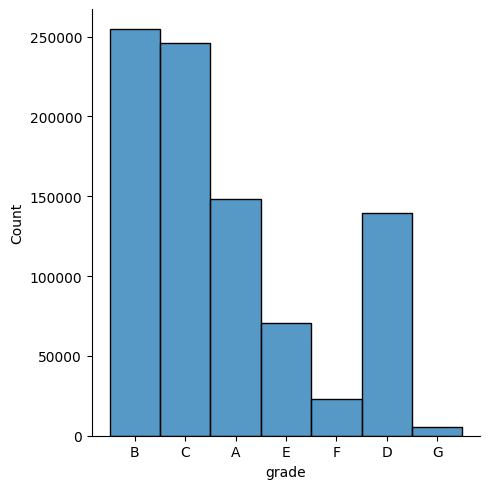

Col:  sub_grade 35


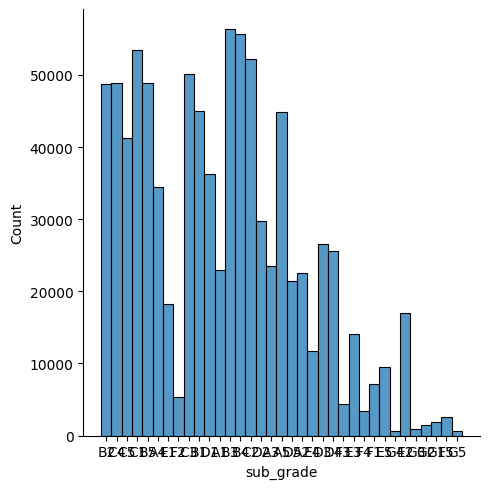

Col:  emp_title 299271
Col:  emp_length 11


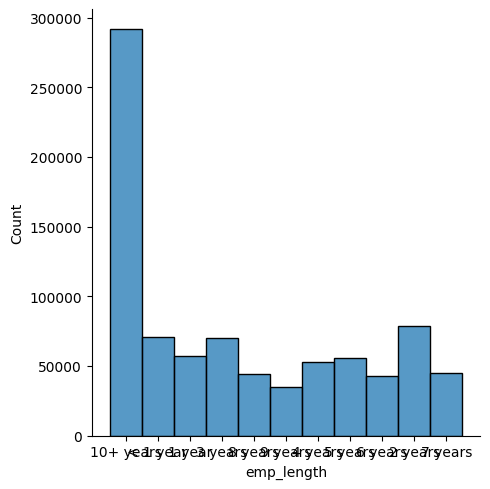

Col:  home_ownership 6


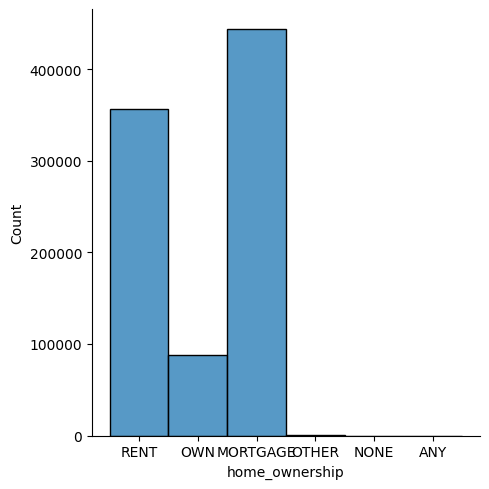

Col:  annual_inc 49384


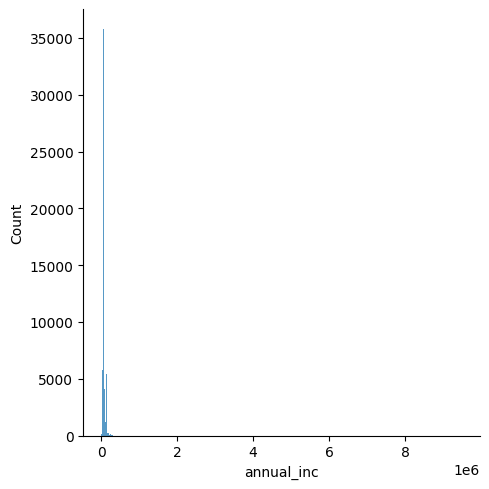

Col:  verification_status 3


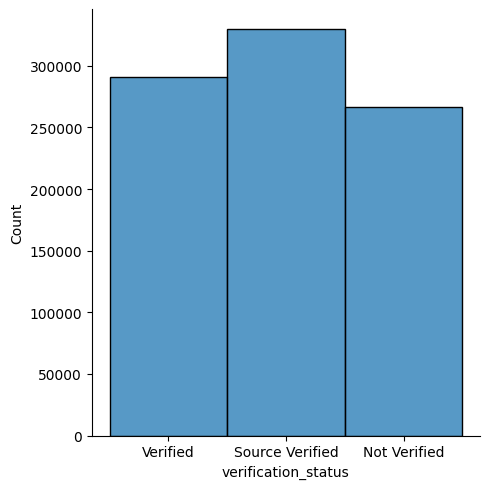

Col:  issue_d 103


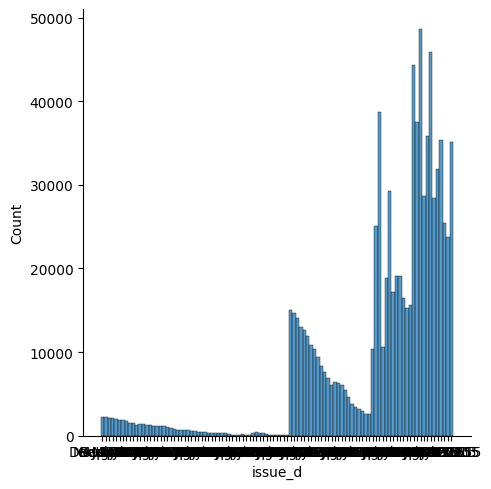

Col:  loan_status 10


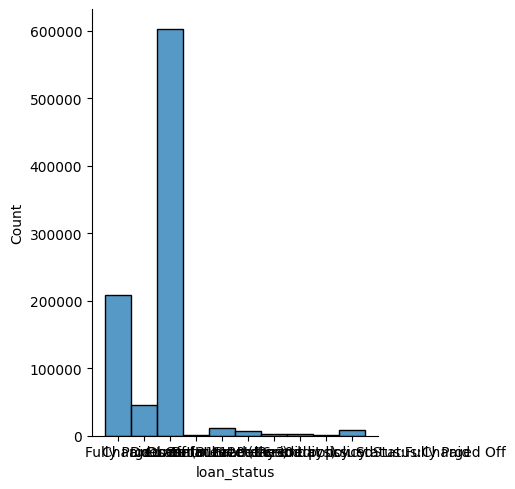

Col:  pymnt_plan 2


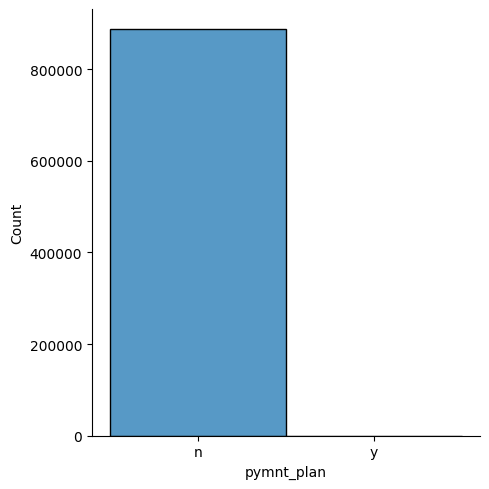

Col:  url 887379
Col:  desc 124468
Col:  purpose 14


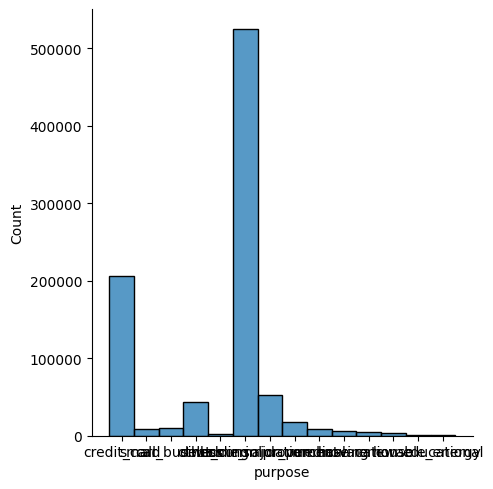

Col:  title 63143
Col:  zip_code 935


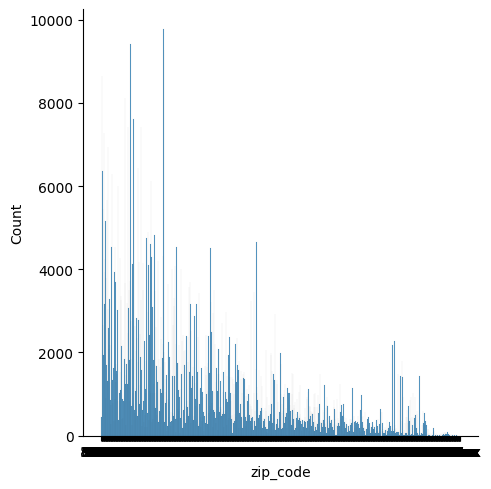

Col:  addr_state 51


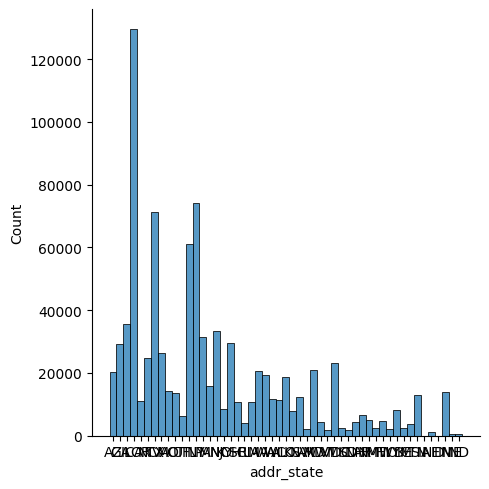

Col:  dti 4086


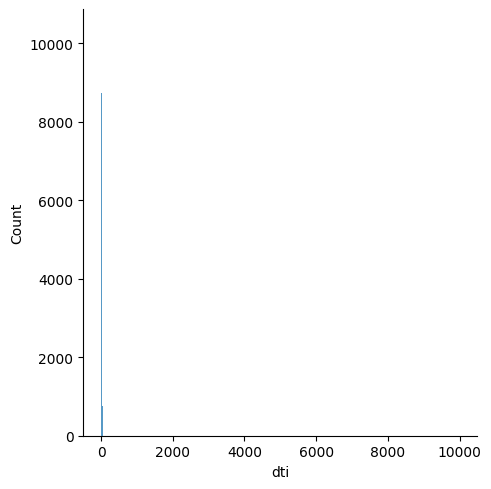

Col:  delinq_2yrs 29


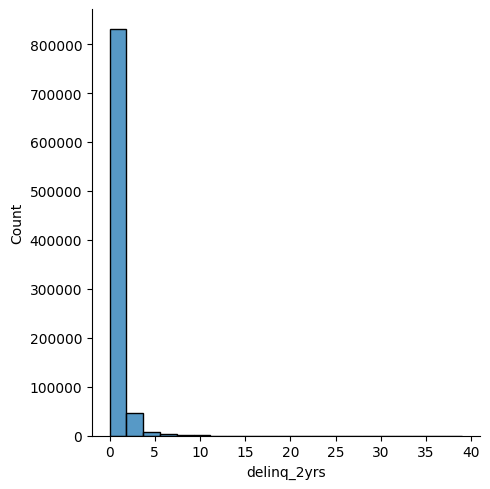

Col:  earliest_cr_line 697


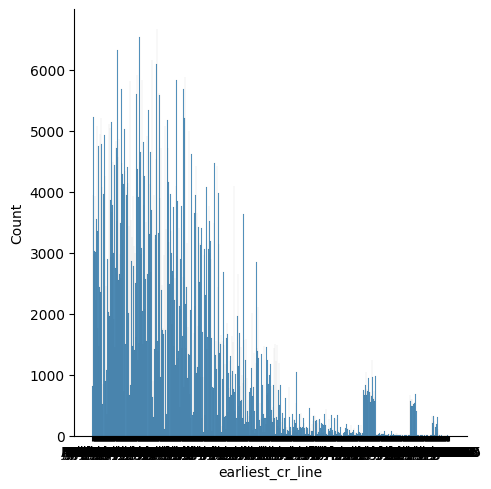

Col:  inq_last_6mths 28


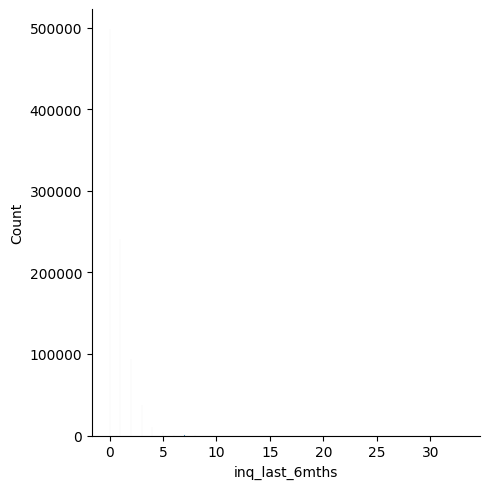

Col:  mths_since_last_delinq 155


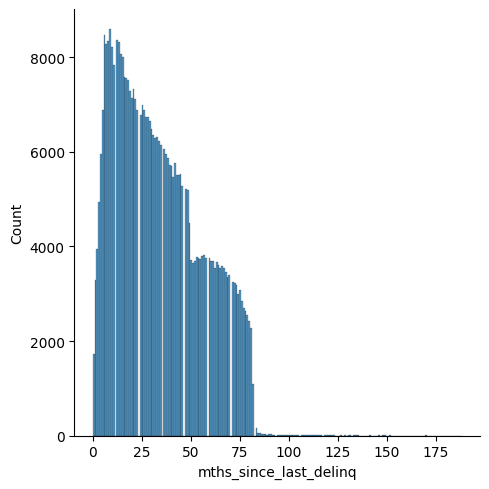

Col:  mths_since_last_record 123


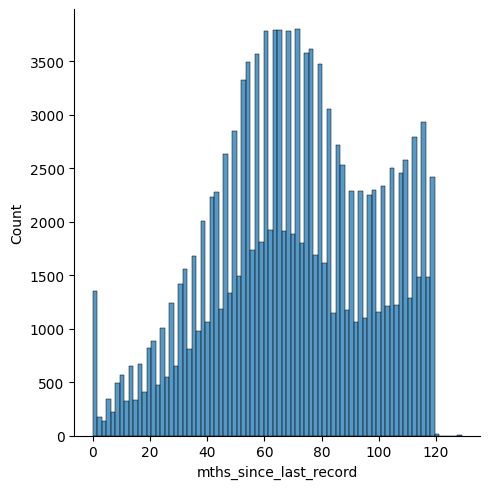

Col:  open_acc 77


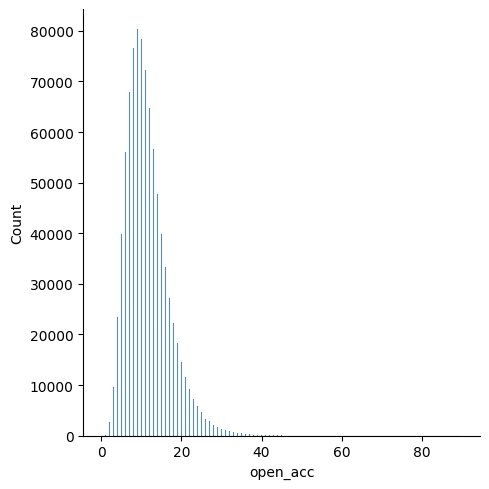

Col:  pub_rec 32


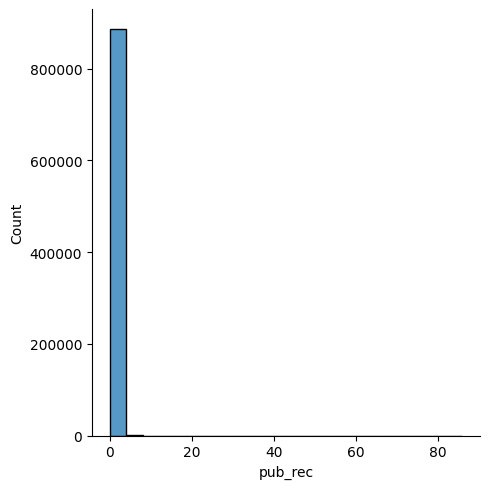

Col:  revol_bal 73740


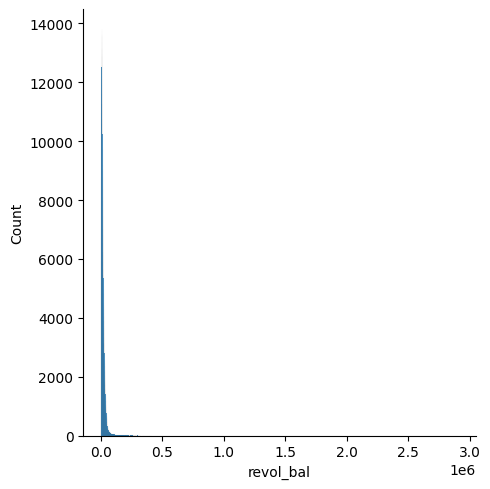

Col:  revol_util 1356


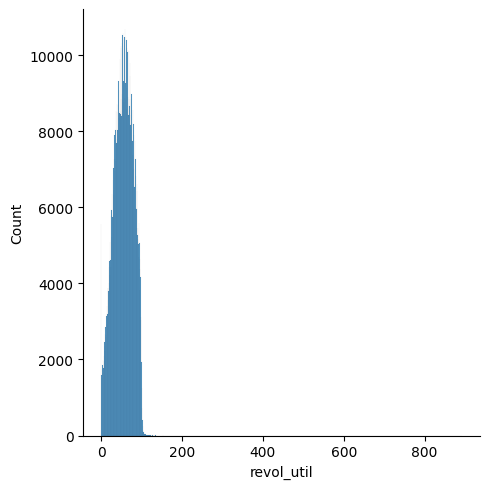

Col:  total_acc 135


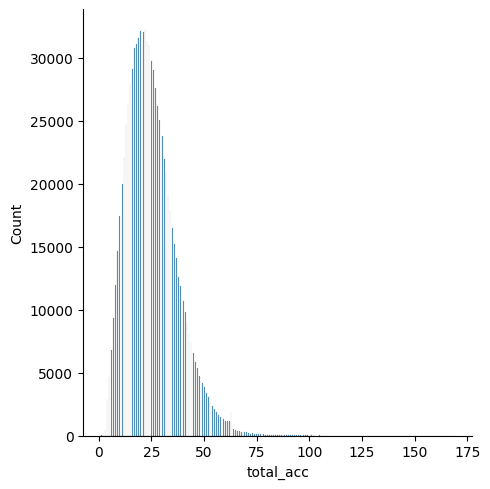

Col:  initial_list_status 2


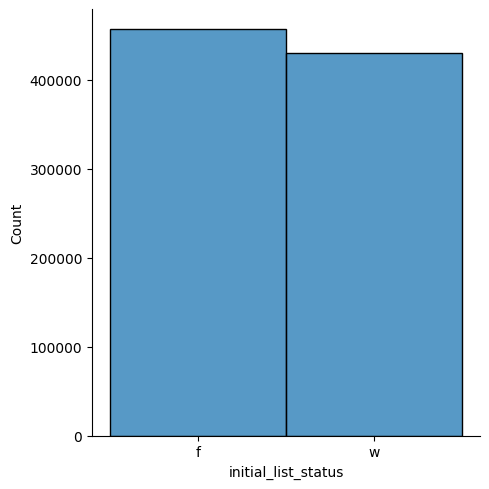

Col:  out_prncp 248332


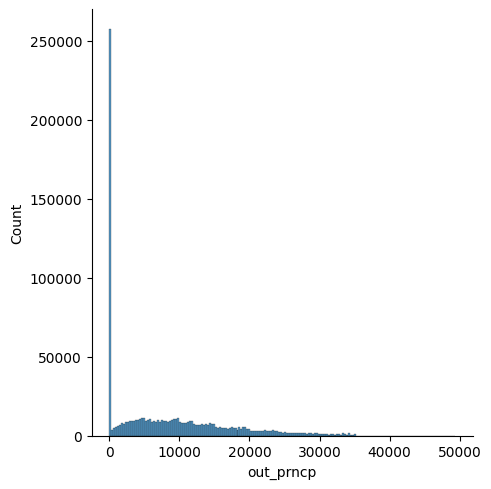

Col:  out_prncp_inv 266244


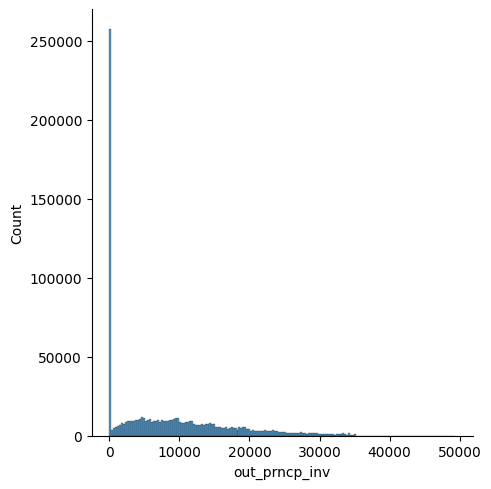

Col:  total_pymnt 506726


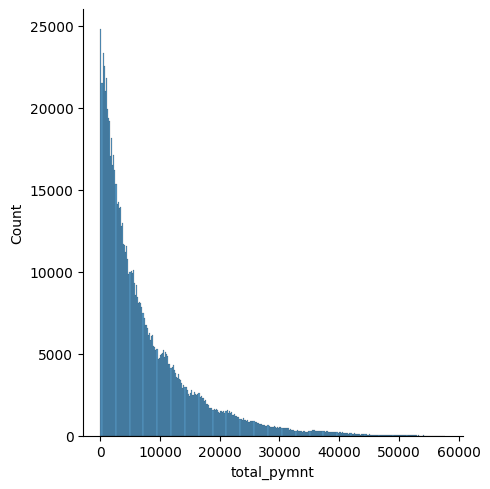

Col:  total_pymnt_inv 506616


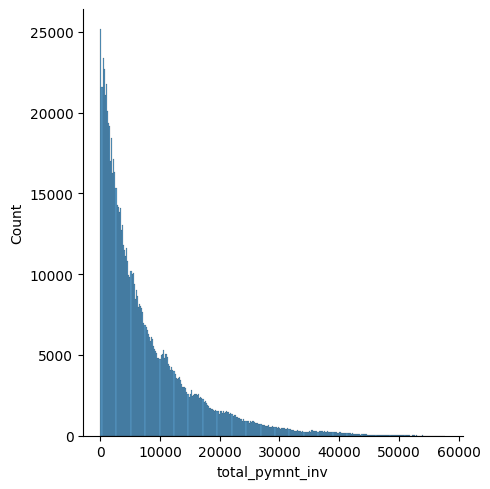

Col:  total_rec_prncp 260227


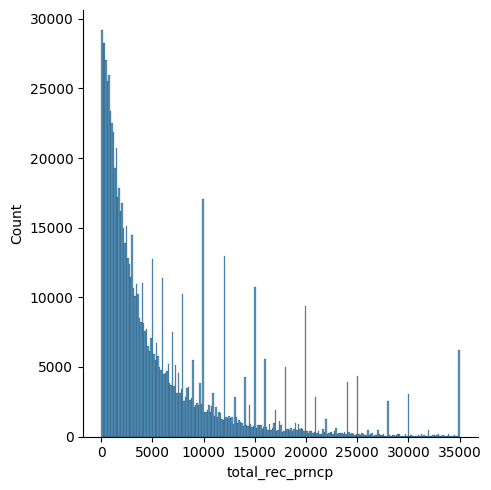

Col:  total_rec_int 324635


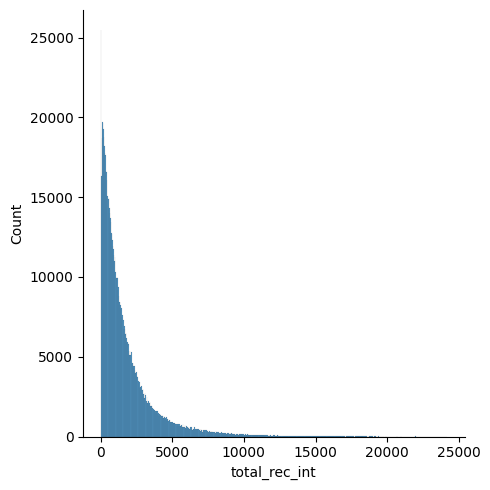

Col:  total_rec_late_fee 6181


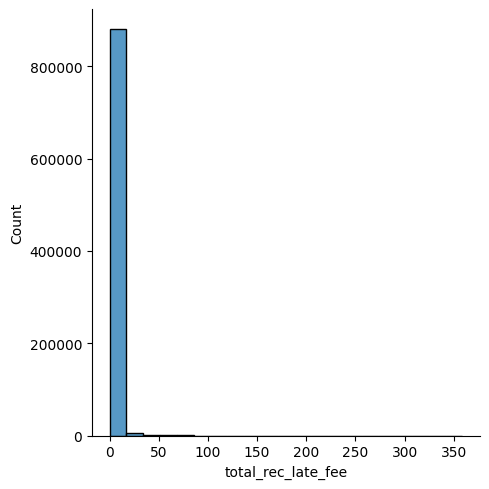

Col:  recoveries 23055


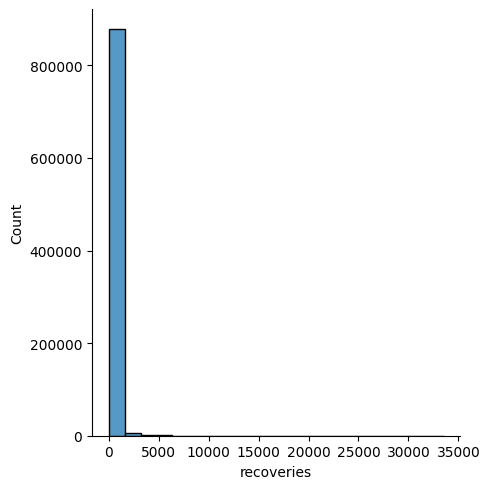

Col:  collection_recovery_fee 20708


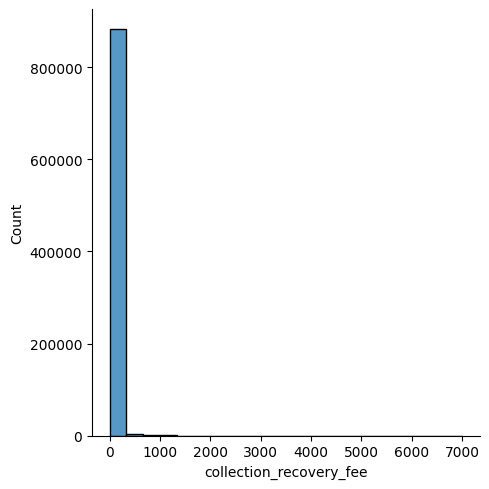

Col:  last_pymnt_d 98


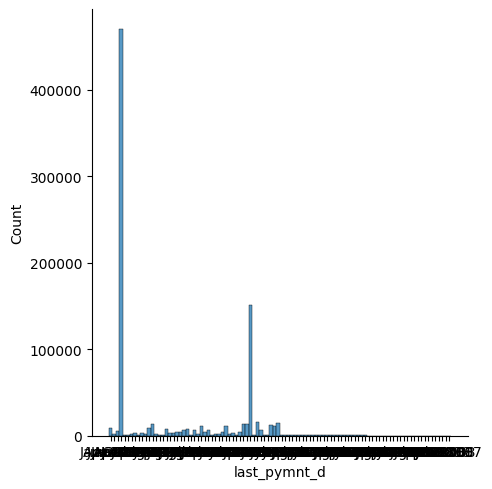

Col:  last_pymnt_amnt 232451


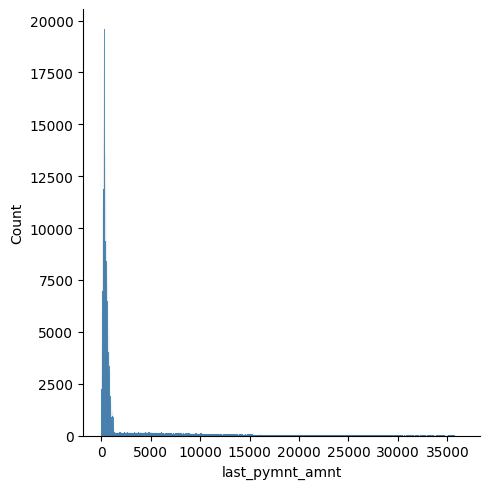

Col:  next_pymnt_d 100


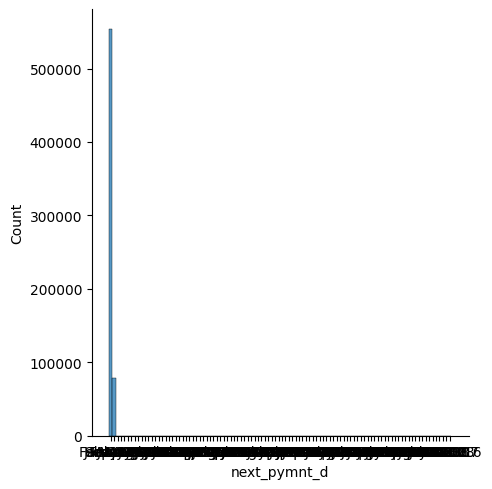

Col:  last_credit_pull_d 103


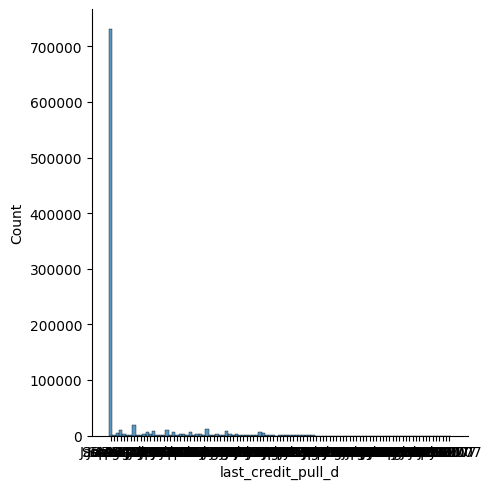

Col:  collections_12_mths_ex_med 12


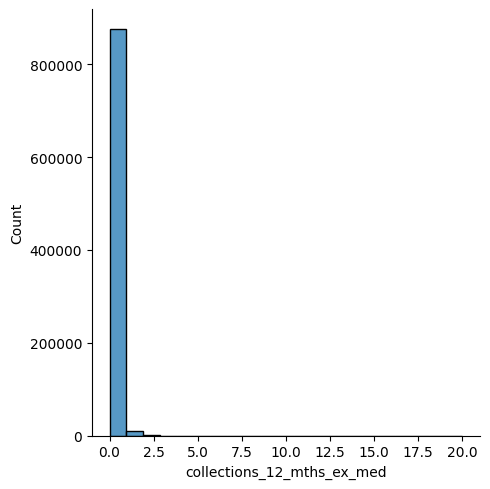

Col:  mths_since_last_major_derog 168


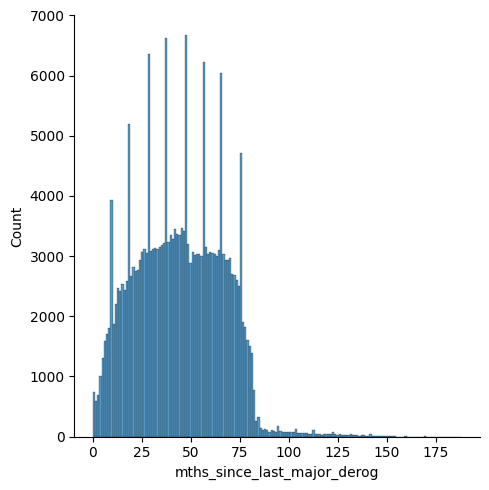

Col:  policy_code 1


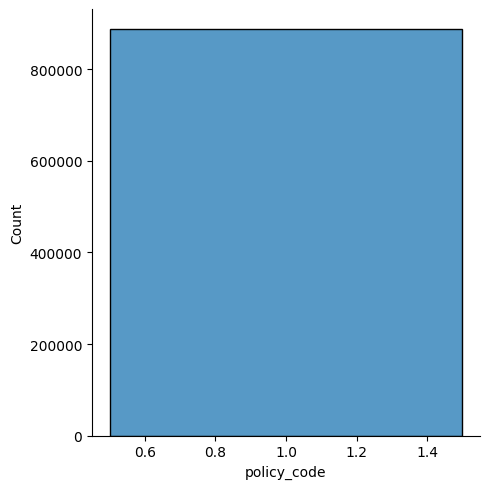

Col:  application_type 2


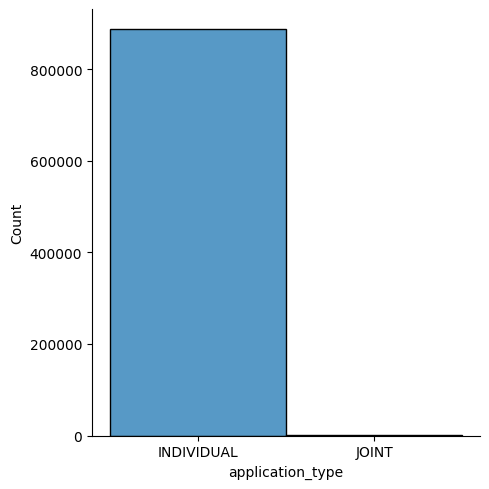

Col:  annual_inc_joint 308


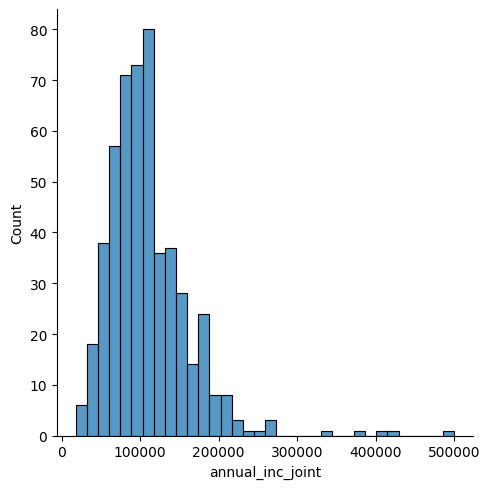

Col:  dti_joint 449


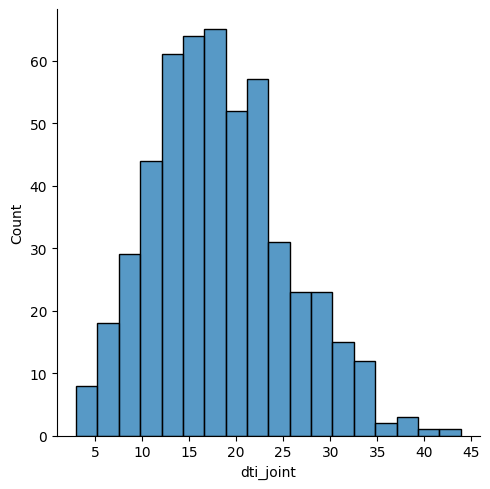

Col:  verification_status_joint 3


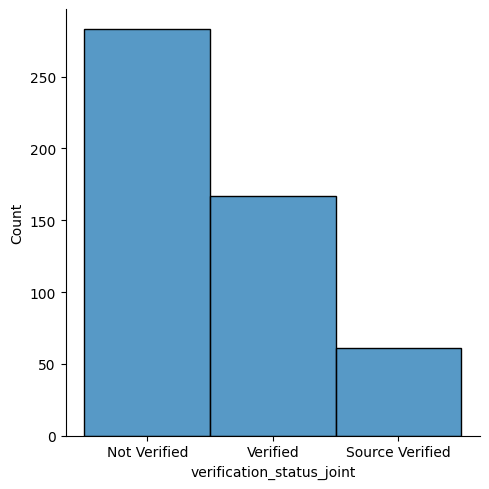

Col:  acc_now_delinq 8


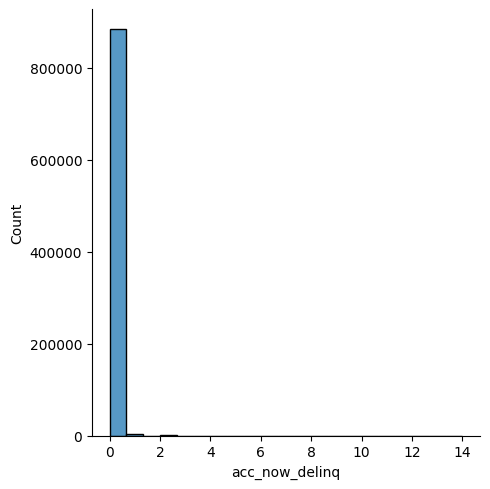

Col:  tot_coll_amt 10325


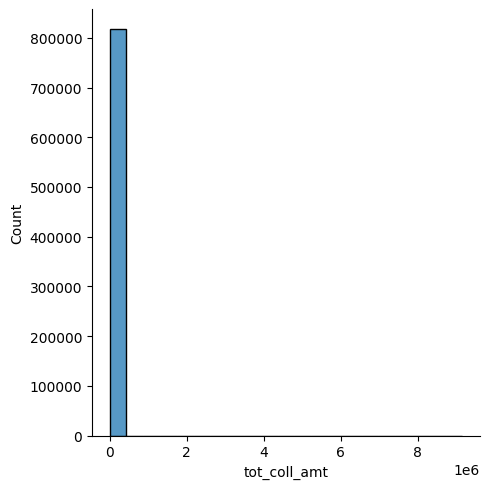

Col:  tot_cur_bal 327342


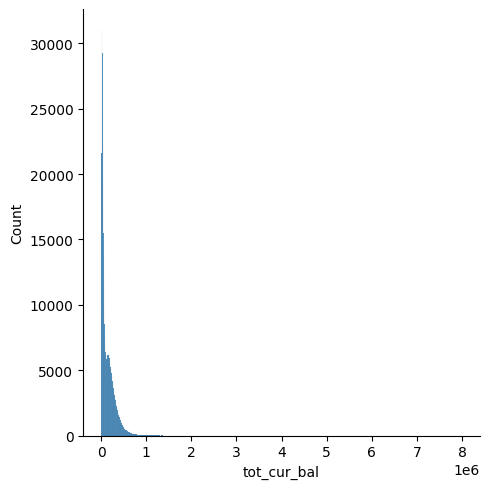

Col:  open_acc_6m 13


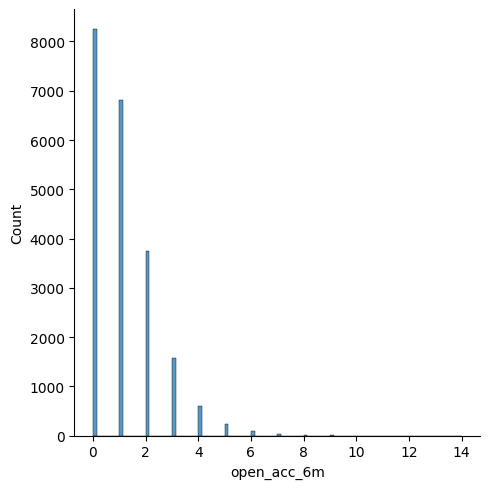

Col:  open_il_6m 35


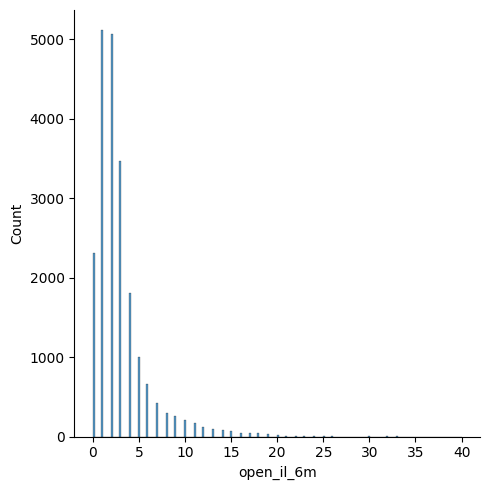

Col:  open_il_12m 12


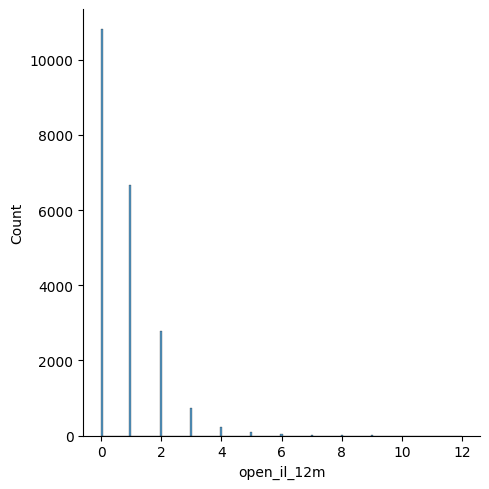

Col:  open_il_24m 17


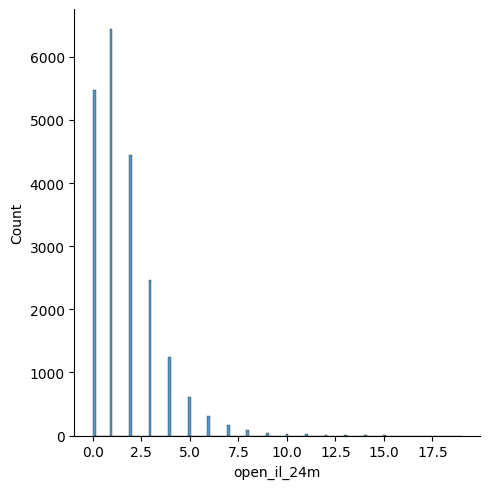

Col:  mths_since_rcnt_il 201


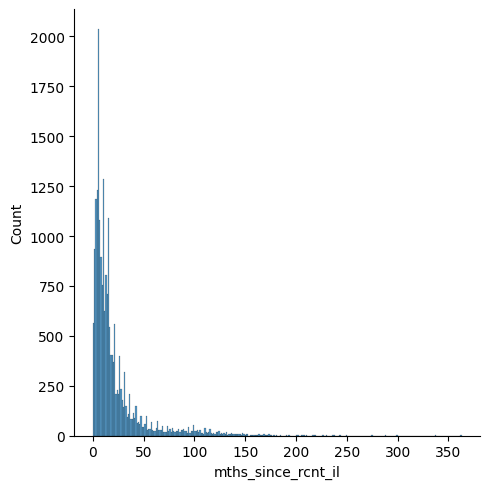

Col:  total_bal_il 17030


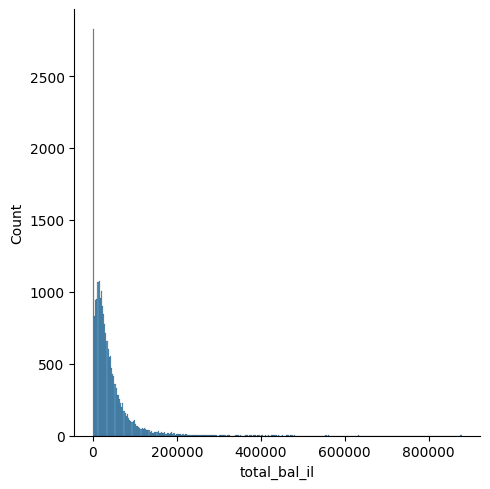

Col:  il_util 1272


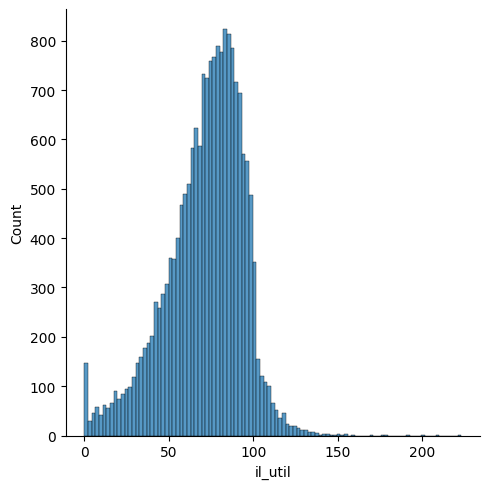

Col:  open_rv_12m 18


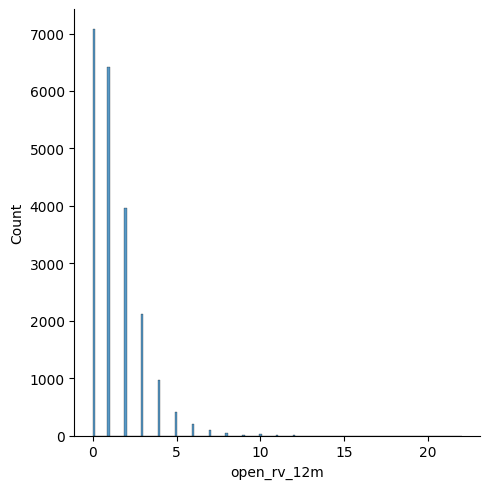

Col:  open_rv_24m 28


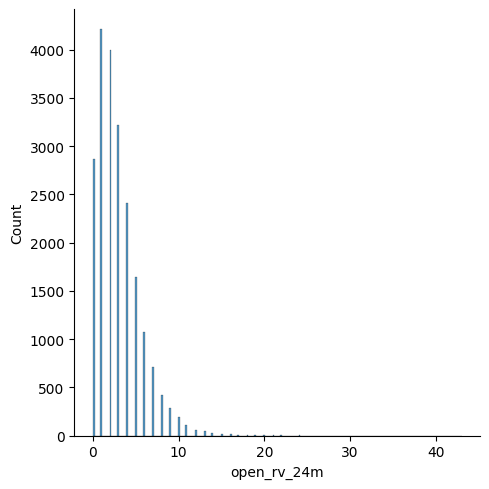

Col:  max_bal_bc 10707


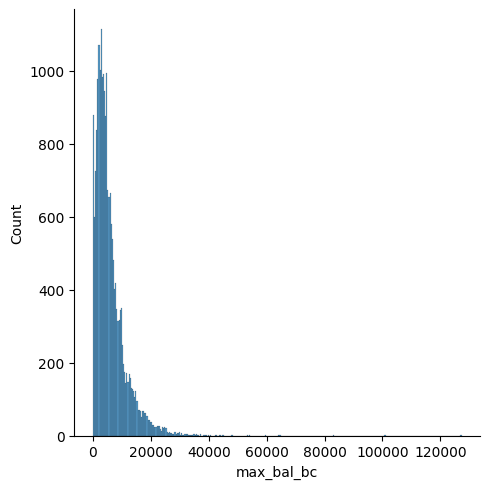

Col:  all_util 1128


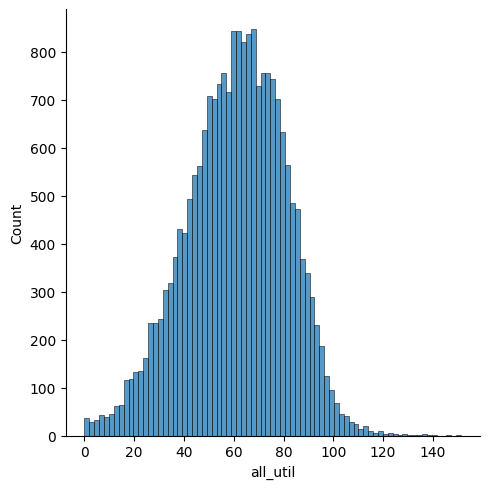

Col:  total_rev_hi_lim 21251


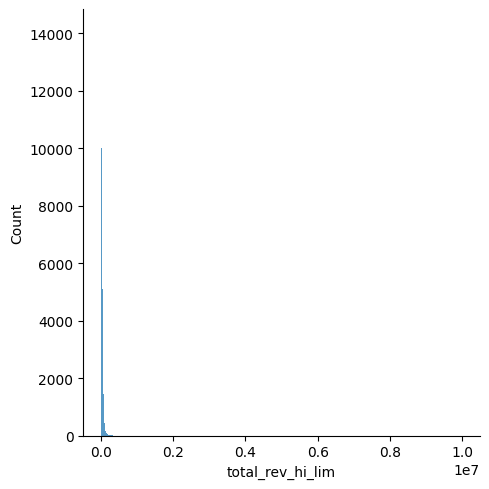

Col:  inq_fi 18


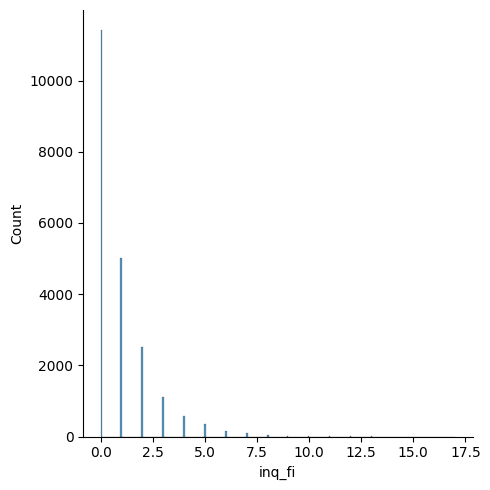

Col:  total_cu_tl 33


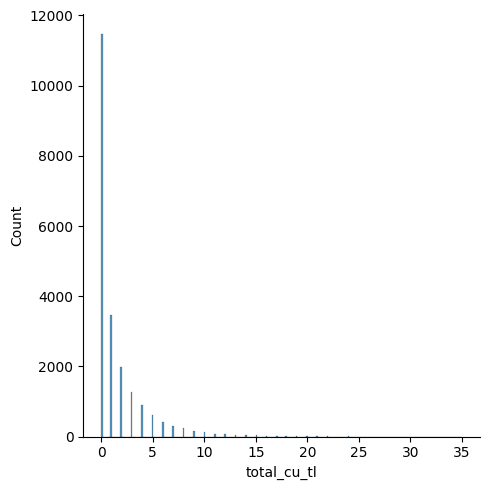

Col:  inq_last_12m 29


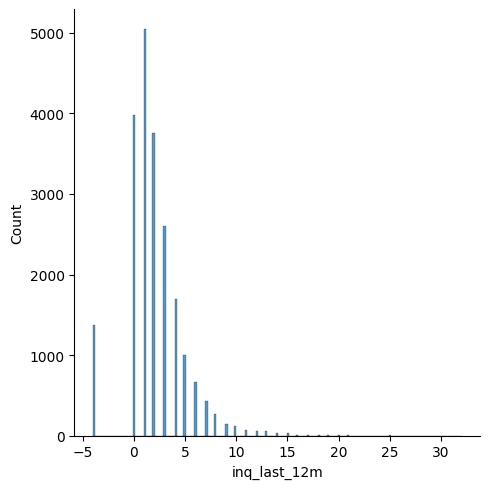

In [10]:
for col in data.columns:
    print("Col: ", col, data[col].nunique())
    if col in (['emp_title','url','desc','title']):
        continue
    sns.displot(data[col])
    plt.show()

In [95]:
exclude_columns = ['id','member_id','policy_code']
continuios = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths',
              'earliest_cr_line','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal',
              'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
              'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt',
              'collections_12_mths_ex_med','mths_since_last_major_derog','annual_inc_joint','dti_joint',
              'acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m',
              'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
              'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m',
              'open_il_24m',
             ]
categorical = ['term','grade','sub_grade','emp_length','home_ownership',
               'verification_status','pymnt_plan','purpose','addr_state','application_type'
               ,'initial_list_status','verification_status_joint'
              ]
strings = ['emp_title','url','desc','title']
dates = ['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
need_to_think = ['zip_code',]
label = ['loan_status']

all_cols = exclude_columns+continuios+categorical+strings+dates+need_to_think+label

In [96]:
assert len(all_cols)==len(data.columns)

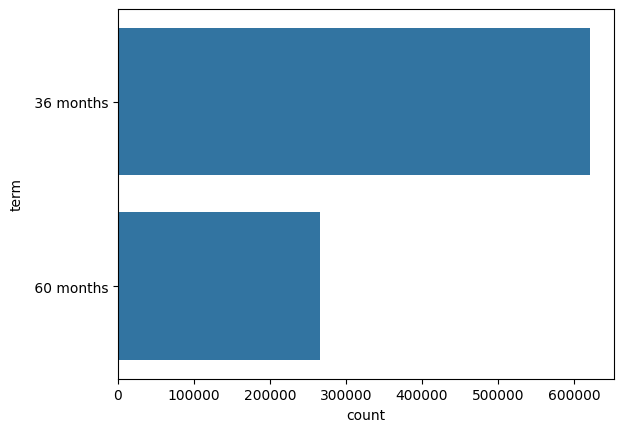

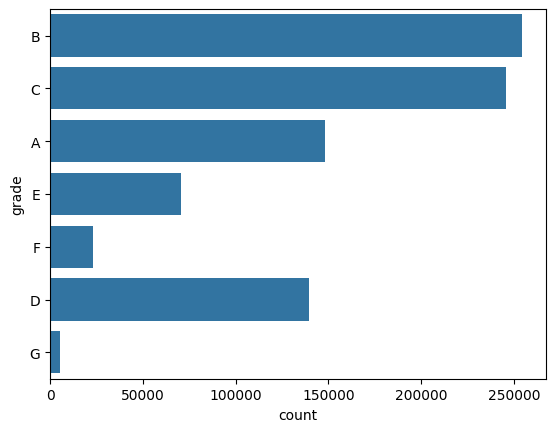

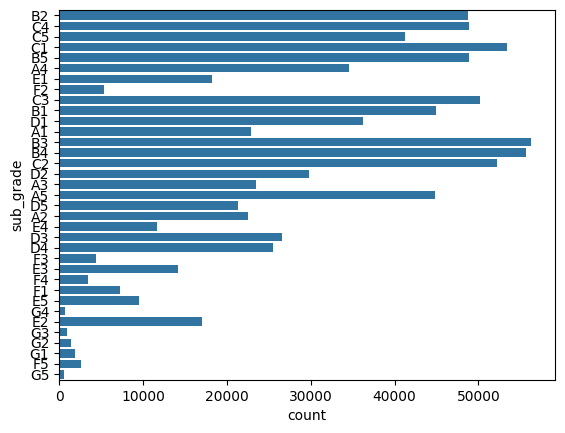

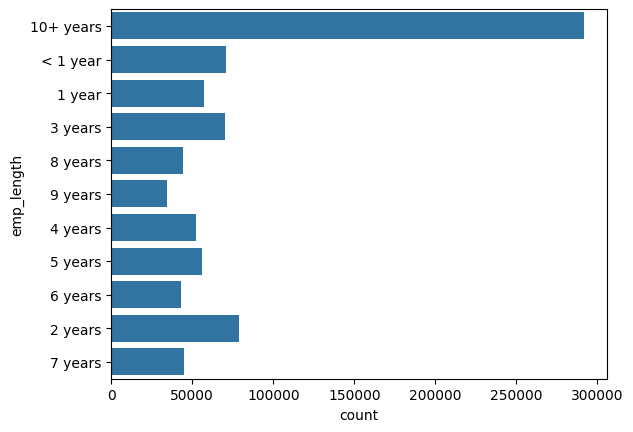

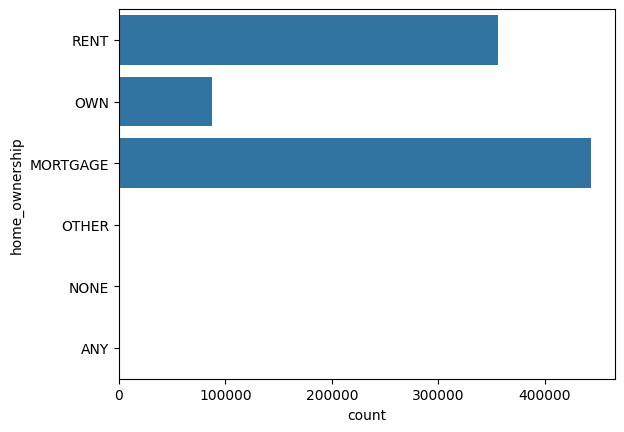

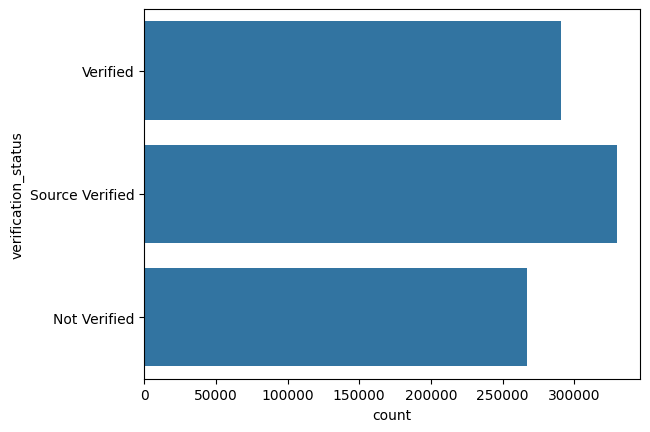

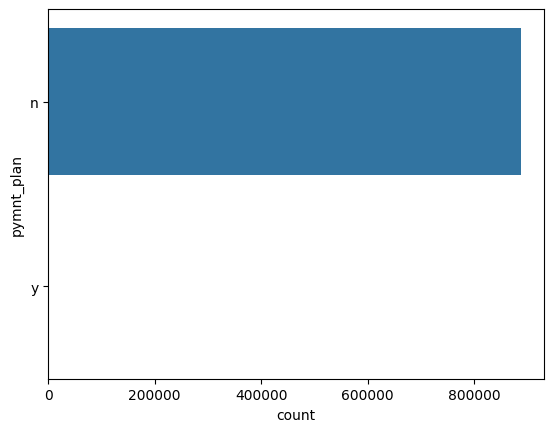

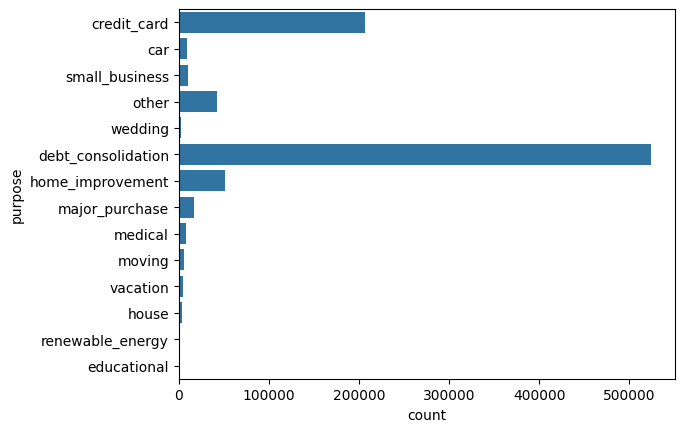

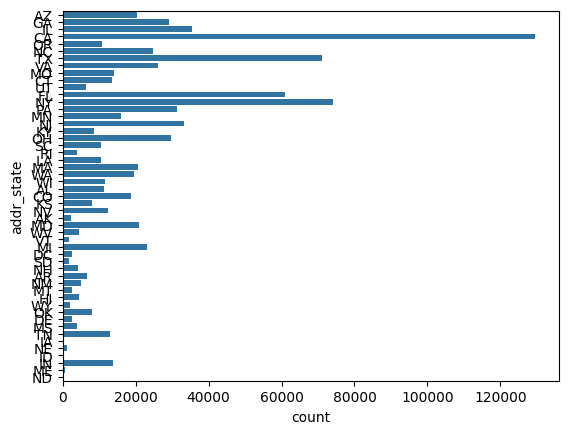

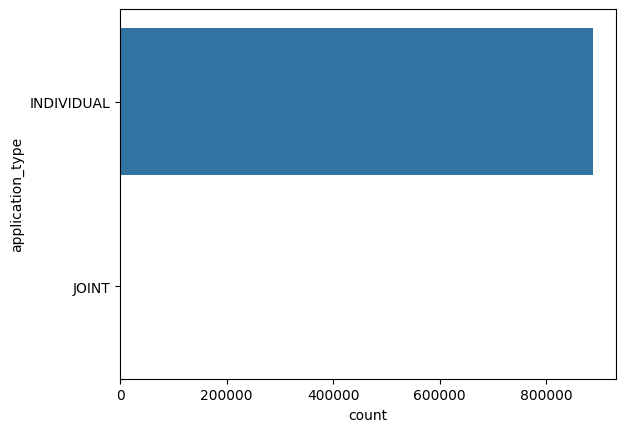

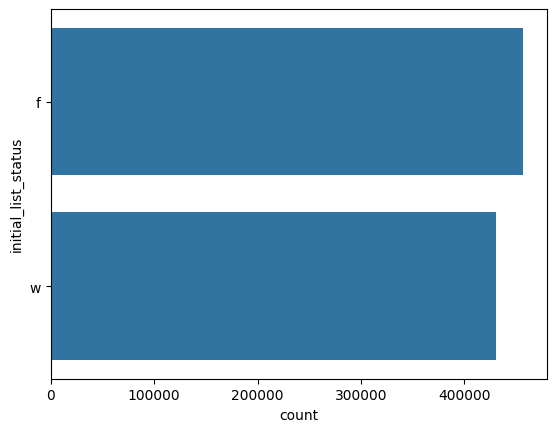

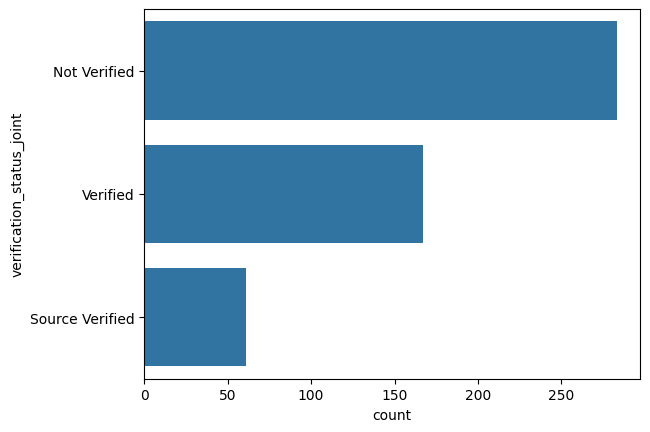

In [120]:
for i in categorical:
    sns.countplot(data=data,y=i)
    plt.show()

<Axes: xlabel='count', ylabel='loan_status'>

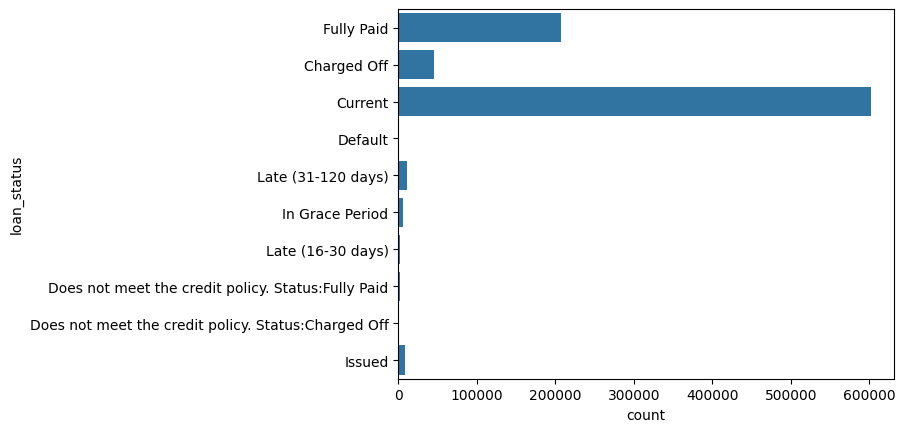

In [127]:
sns.countplot(data=data, y='loan_status')#.set_xscale("log")


In [132]:
# need to tansform the label - to paid and co
data['issue_d'].agg(['min','max'])


min    Apr-2008
max    Sep-2015
Name: issue_d, dtype: object

In [137]:
data['last_pymnt_d'].max()

TypeError: '>=' not supported between instances of 'str' and 'float'